In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


In [2]:
pd.set_option('max_column', None)
data = pd.read_csv('../input/quality-prediction-in-a-mining-process/MiningProcess_Flotation_Plant_Database.csv')

In [3]:
data.head(2)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235","250,576","295,096","306,4","250,225","250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532","250,862","295,096","306,4","250,137","248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"


In [4]:
data

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235","250,576","295,096","306,4","250,225","250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532","250,862","295,096","306,4","250,137","248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874","250,313","295,096","306,4","251,345","248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487","250,049","295,096","306,4","250,422","251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136","249,895","295,096","306,4","249,983","248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786","299,163","299,92","299,623","346,794","313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879","299,487","299,71","300,465","330,023","236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397","299,487","299,927","299,707","329,59","225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959","298,045","299,372","298,819","351,453","308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


### Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [6]:
data.describe()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453
unique,4097,278,293,409317,319416,180189,131143,105805,43675,80442,40630,196006,194711,90548,86819,299573,331189,322315,309264,276051,301502,295667,38696,55569
top,2017-06-16 15:00:00,"64,03","6,26","2562,5","534,668","402,246","10,0591","1,75","299,927","255,322","298,828","295,096","306,4","299,927","299,487","452,441","608,887","601,06","491,406","513,879","474,37","479,478","65,44","2,08"
freq,180,142560,142560,690,959,1735,1509,3214,13683,1487,6012,82829,82832,13766,3405,1013,817,989,733,709,746,905,16920,17100


In [7]:
data.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [8]:
for column in data.columns:
    data[column] = data[column].apply(lambda x : x.replace(',' , '.'))

In [9]:
data

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.2,2710.94,441.052,386.57,9.62129,1.65365,302.344,298.786,299.163,299.92,299.623,346.794,313.695,392.16,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,299.71,300.465,330.023,236.7,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.2,2692.2,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,299.927,299.707,329.59,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.13,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.55,301.959,298.045,299.372,298.819,351.453,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


### Feature Engineering

In [11]:
data['date'] = data['date'].apply(lambda x : re.search('[0-9]*-[0-9]*' , x).group(0)) # for getting month and year 

In [12]:
#year
data['Year']=data['date'].apply(lambda x : re.search('^[^-]*' , x).group(0))

#month
data['Month'] = data['date'].apply(lambda x : re.search('[^-]*$' , x).group(0))

In [13]:
data = data.drop('date' , axis = 1)

In [14]:
data

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Year,Month
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31,2017,03
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31,2017,03
2,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31,2017,03
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31,2017,03
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31,2017,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.2,2710.94,441.052,386.57,9.62129,1.65365,302.344,298.786,299.163,299.92,299.623,346.794,313.695,392.16,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71,2017,09
737449,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,299.71,300.465,330.023,236.7,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71,2017,09
737450,49.75,23.2,2692.2,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,299.927,299.707,329.59,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.13,64.27,1.71,2017,09
737451,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.55,301.959,298.045,299.372,298.819,351.453,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71,2017,09


In [15]:
data = data.astype(np.float)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [16]:
data

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Year,Month
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,295.096,306.400,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31,2017.0,3.0
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,295.096,306.400,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31,2017.0,3.0
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,295.096,306.400,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31,2017.0,3.0
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,295.096,306.400,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31,2017.0,3.0
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,295.096,306.400,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31,2017.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,299.920,299.623,346.794,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71,2017.0,9.0
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,299.710,300.465,330.023,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71,2017.0,9.0
737450,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,299.927,299.707,329.590,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71,2017.0,9.0
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,299.372,298.819,351.453,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71,2017.0,9.0


### visualization

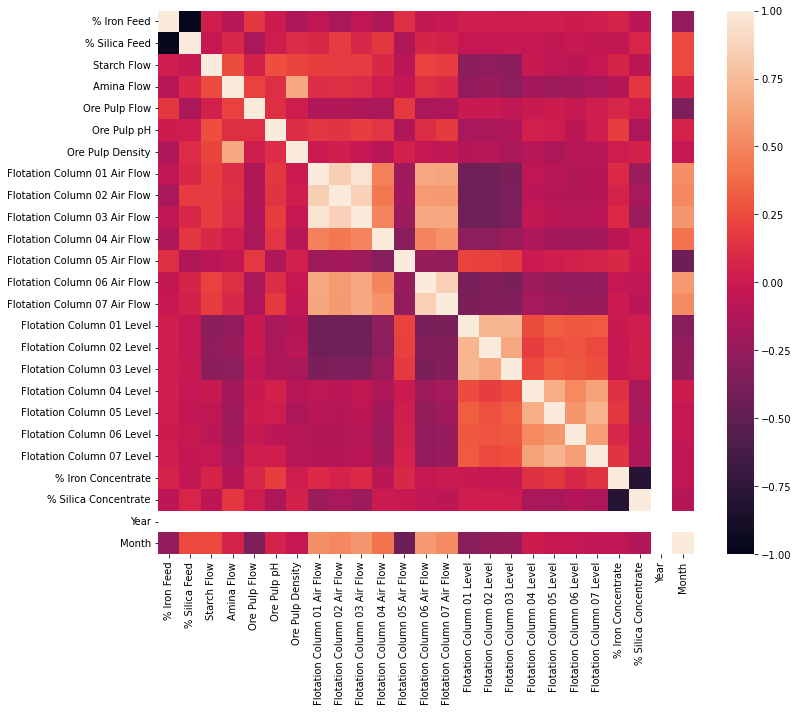

In [17]:
plt.figure(figsize = (12 , 10))
sns.heatmap(data.corr() , vmin = -1.0 , vmax = 1.0)
plt.show()

In [19]:
data['Year'].unique()

array([2017.])

In [20]:
data = data.drop('Year',axis = 1)

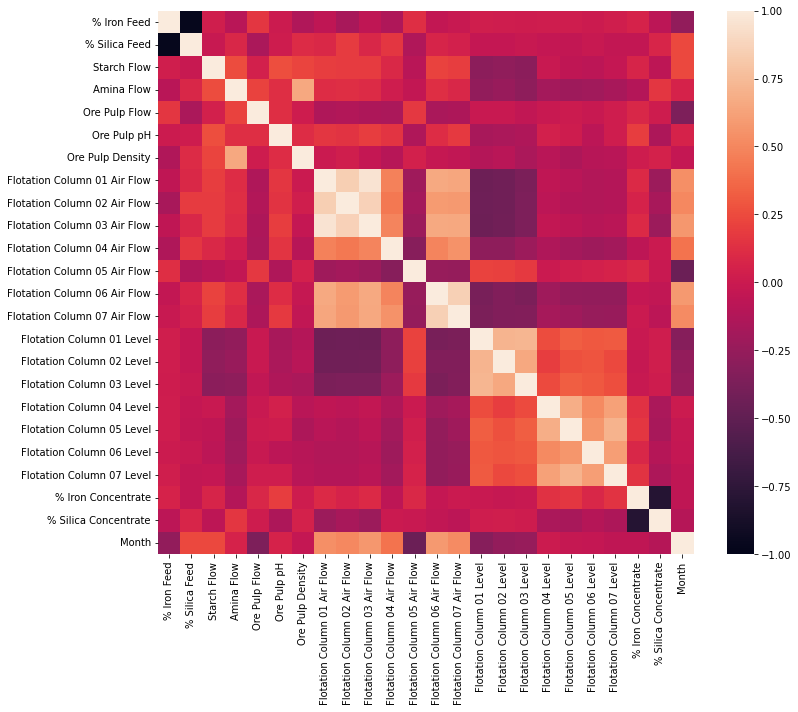

In [21]:
plt.figure(figsize = (12 , 10))
sns.heatmap(data.corr() , vmin = -1.0 , vmax = 1.0)
plt.show()

### Splitting and Scaling the data

In [23]:
# with and without iron concentrate
target = '% Silica Concentrate'
y = data[target]
X = data.drop([target , '% Iron Concentrate'] , axis = 1)
Xi = data.drop(target , axis = 1) # with iron

In [24]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
Xi = scaler.fit_transform(Xi)

In [25]:
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.70)
Xi_train , Xi_test , yi_train , yi_test = train_test_split(Xi , y , train_size = 0.70)

### Training

In [26]:
model1 = LinearRegression()
model2 = LinearRegression()


In [28]:
model1.fit(X_train , y_train)
print(f'model without iron R^2 score: {model1.score(X_test , y_test)}')

model without iron R^2 score: 0.15500715337212434


In [29]:
model2.fit(Xi_train , yi_train)
print(f'model without iron R^2 score: {model2.score(Xi_test , yi_test)}')

model without iron R^2 score: 0.6870587122898166
